In [76]:
import pandas as pd
df = pd.read_csv('car_price_dataset.csv') 
df.columns = df.columns.str.strip()
print(df.columns)
print(df.dtypes)

df

#visualização inicial do DataSet

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')
Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [77]:
df.info
df.isnull().sum()
#verificando se há algum valor nulo para ser tratado

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [78]:
brand_counts = df["Brand"].value_counts()
brand_counts_df = brand_counts.reset_index()
brand_counts_df.columns = ["Brand", "Amount"]
print(brand_counts_df)
#verificando quantas marcas e a quantidade delas

brand_counts.mean()
#vendo a média de carrros por marca


        Brand  Amount
0        Ford    1048
1        Audi    1038
2  Volkswagen    1020
3       Honda    1009
4   Chevrolet    1003
5         BMW     999
6     Hyundai     995
7         Kia     976
8      Toyota     970
9    Mercedes     942


1000.0

In [79]:
from datetime import datetime

current_year = datetime.now().year

df['Age'] = current_year - df['Year']

df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Age
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,5
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,13
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,5
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,2
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,22
...,...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884,21
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240,23
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866,15
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084,23


Text(0.5, 1.0, 'Distribuição dos Preços por Marca')

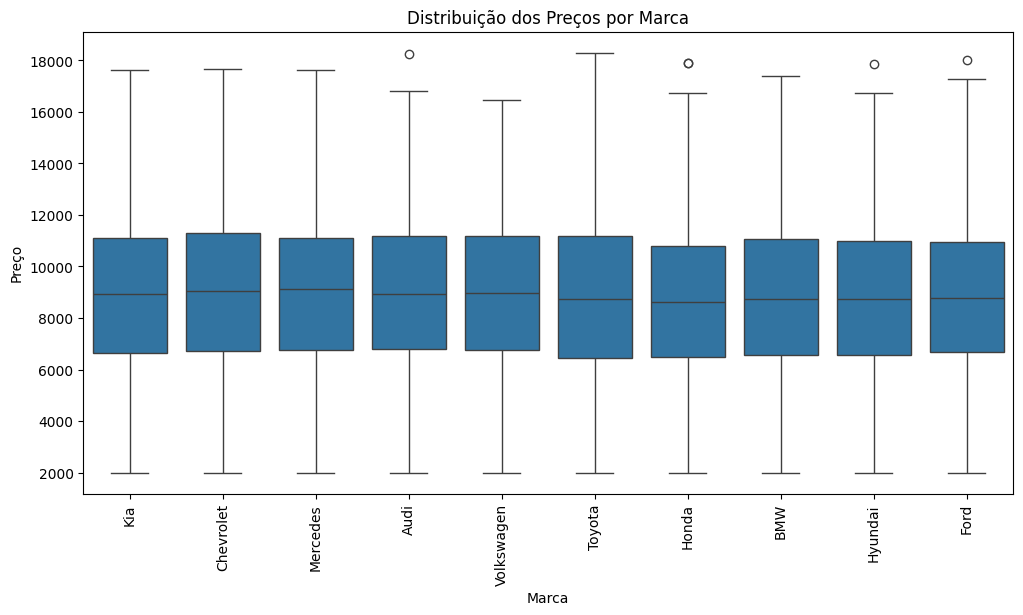

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x = "Brand", y = "Price", data=df)

plt.xticks(rotation=90)
plt.xlabel("Marca")
plt.ylabel("Preço")
plt.title("Distribuição dos Preços por Marca")

Text(0.5, 1.0, 'Distribuição dos preços por idade')

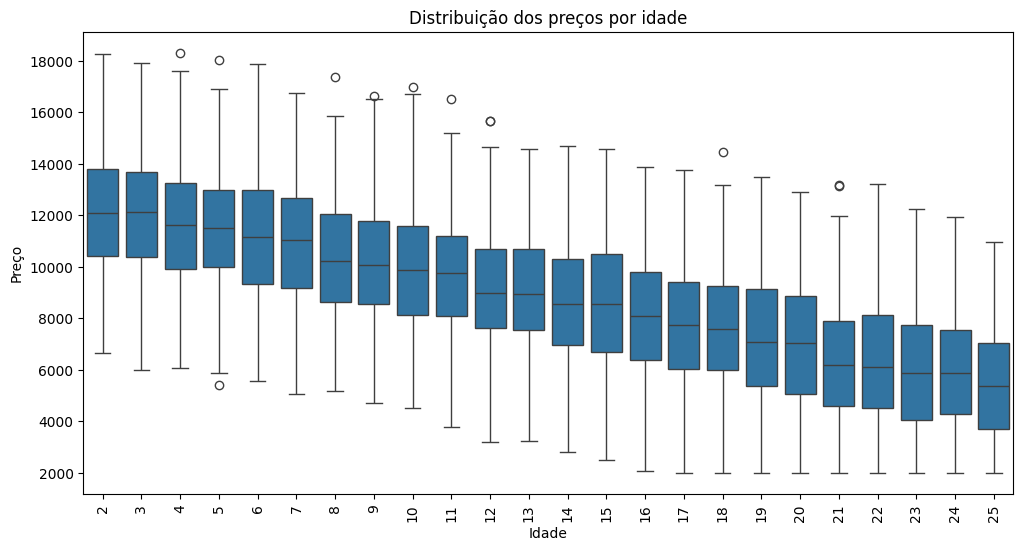

In [81]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x = "Age", y = "Price", data=df)

plt.xticks(rotation=90)
plt.xlabel("Idade")
plt.ylabel("Preço")
plt.title("Distribuição dos preços por idade")

C:\Users\Ribas\AppData\Local\Temp\ipykernel_656\2984841920.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby("Miles range")["Price"].mean().reset_index()
C:\Users\Ribas\AppData\Local\Temp\ipykernel_656\2984841920.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Miles range", y = "Price", data=df_grouped, palette=custom_palette)
C:\Users\Ribas\AppData\Local\Temp\ipykernel_656\2984841920.py:10: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = "Miles range", y = "Price", data=df_grouped, palette=custom_palette)


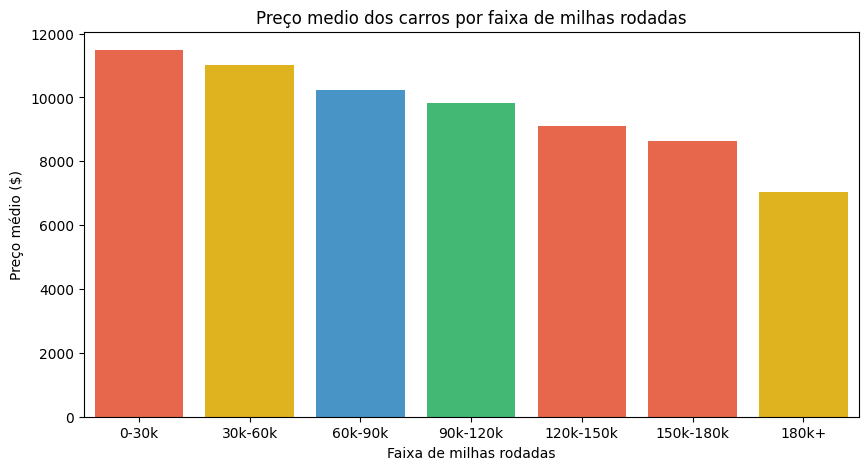

In [93]:
bins = [0, 30000, 60000, 90000, 120000, 150000, 180000, 300000]
labels = ["0-30k", "30k-60k", "60k-90k", "90k-120k", "120k-150k", "150k-180k", "180k+"]

df["Miles range"] = pd.cut(df["Mileage"], bins=bins, labels=labels)

df_grouped = df.groupby("Miles range")["Price"].mean().reset_index()

plt.figure(figsize=(10,5))
custom_palette = ["#FF5733", "#FFC300", "#3498DB", "#2ECC71", "#FF5733"]
sns.barplot(x = "Miles range", y = "Price", data=df_grouped, palette=custom_palette)

plt.xlabel("Faixa de milhas rodadas")
plt.ylabel("Preço médio ($)")
plt.title("Preço medio dos carros por faixa de milhas rodadas")
plt.show()

In [96]:
from scipy import stats

miles_range = df["Miles range"]
miles_range_groups = [df[df["Miles range"] == faixa]["Price"] for faixa in miles_range.unique()]

f_stat, p_value = stats.f_oneway(*miles_range_groups)
print(f"Estatística F: {f_stat}, Valor-P: {p_value}")

Estatística F: 663.2200224899783, Valor-P: 0.0


In [97]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Brand Number'] = label_encoder.fit_transform(df['Brand'])

print(df[['Brand', 'Brand Number']])
#dando números para as marcas afim de conseguir criar uma correlação com elas

df['Miles Range number'] = label_encoder.fit_transform(df['Miles range'])

print(df[['Miles range', 'Miles Range number']])

           Brand  Brand Number
0            Kia             6
1      Chevrolet             2
2       Mercedes             7
3           Audi             0
4     Volkswagen             9
...          ...           ...
9995         Kia             6
9996   Chevrolet             2
9997         BMW             1
9998        Ford             3
9999  Volkswagen             9

[10000 rows x 2 columns]
     Miles range  Miles Range number
0          180k+                   3
1          0-30k                   0
2          180k+                   3
3      150k-180k                   2
4          180k+                   3
...          ...                 ...
9995       0-30k                   0
9996   150k-180k                   2
9997     60k-90k                   5
9998       180k+                   3
9999   150k-180k                   2

[10000 rows x 2 columns]


In [98]:
print(df.dtypes)

Brand                   object
Model                   object
Year                     int64
Engine_Size            float64
Fuel_Type               object
Transmission            object
Mileage                  int64
Doors                    int64
Owner_Count              int64
Price                    int64
Age                      int64
Miles range           category
Brand Number             int32
Miles Range number       int32
dtype: object


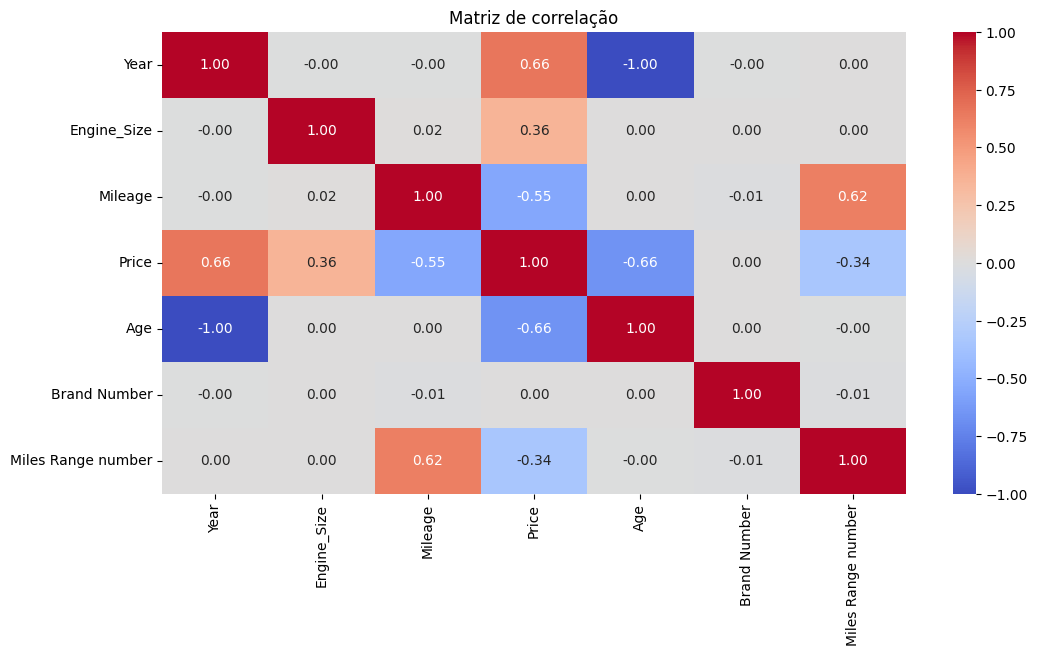

In [88]:
df_filtered = df.drop(columns=["Brand", "Model", "Fuel_Type", "Transmission", "Doors", "Owner_Count", "Miles range"])
correlation_matrix = df_filtered.corr()

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlação")
plt.show()

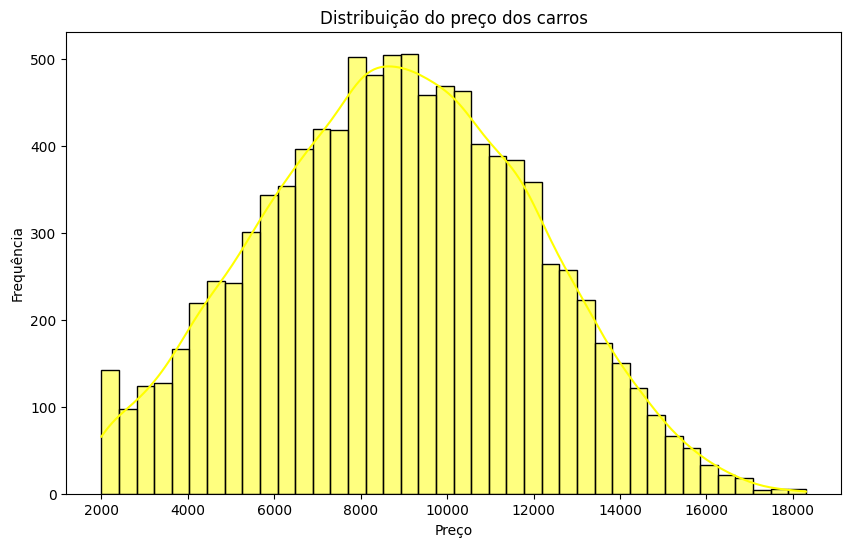

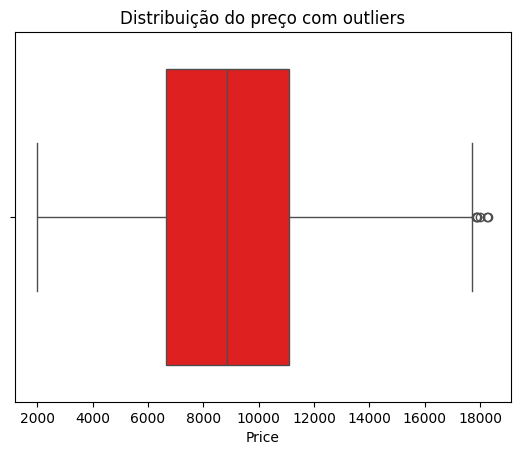

In [90]:
plt.figure(figsize=(10,6))
sns.histplot(df["Price"], kde=True, color="yellow")
plt.title("Distribuição do preço dos carros")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

sns.boxplot(x=df["Price"], color="red")
plt.title("Distribuição do preço com outliers")
plt.show()

In [ ]:
from scipy import stats

df_1_owner = df[df["Owner_Count"] == 1]["Price"]
df_2m_owners = df[df["Owner_Count"] > 1]["Price"]

t_stat, p_value = stats.ttest_ind(df_1_owner, df_2m_owners)
print(f"Teste T: {t_stat}, Valor-P: {p_value}")

Teste T: -0.18826431334815108, Valor-P: 0.8506732797726112


Percebe-se que não há diferença significativa entre os grupos comparados

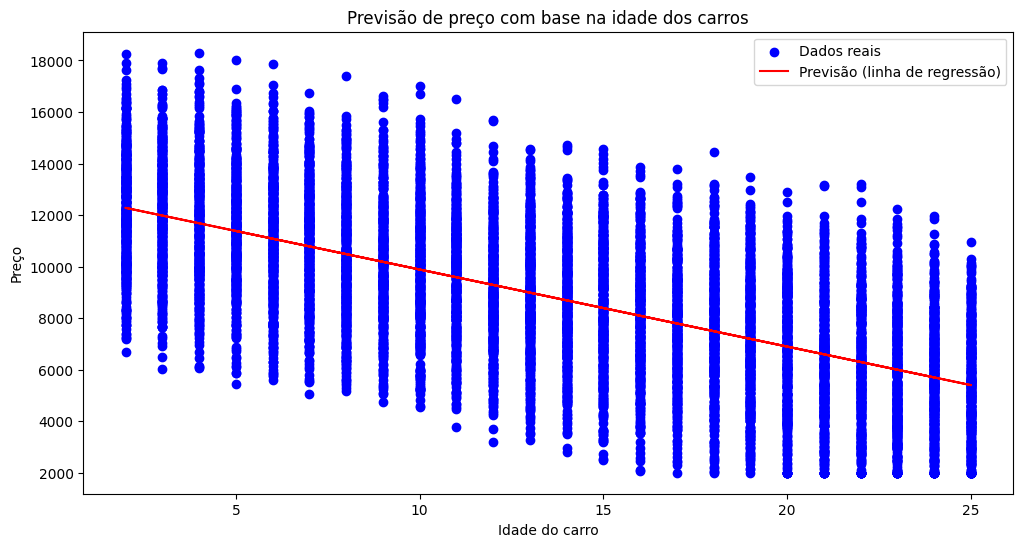

In [101]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x = df[["Age"]]
y = df["Price"]

model = LinearRegression()

model.fit(x, y)

y_pred = model.predict(x)

plt.figure(figsize=(12,6))
plt.scatter(x, y, color = 'blue', label = 'Dados reais')
plt.plot(x, y_pred, color='red', label='Previsão (linha de regressão)')
plt.title('Previsão de preço com base na idade dos carros')
plt.xlabel("Idade do carro")
plt.ylabel("Preço")
plt.legend()
plt.show()